In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"

/Users/csuarezgurruchaga/Desktop/Digital-House/clase_20/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En esta notebook, vamos a poner en práctica los conceptos de aprendizaje supervisado que aprendimos. El ejercicio será entrenar un modelo de Naive Bayes Gaussiano para clasificar distintas especies de flores. Trabajaremos sobre un dataset típico en _machine learning_ conocido como [Iris](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris), el cual provee información sobre 150 muestras de este tipo de flor. Contamos con estas características: ancho y largo de sépalos y pétalos y la etiqueta de la especie a la que corresponde cada muestra (Setosa, Versicolor y Virginica).

<img src="https://shahinrostami.com/images/ml-with-kaggle/iris-2338142_960_720-1.jpg">
<center><i>La flor iris</i></center>


Recordemos los pasos del _workflow_ típico de Scikit-Learn:

1. Seleccionar una clase de modelo
2. Elegir los hiperparámetros del modelo
3. Preparar los datos en una matriz de _features_ y un vector _target_
4. Separar los sets de entrenamiento y de testeo
5. Ajustar el modelo a los datos de entrenamiento
6. Predecir etiquetas para datos desconocidos
7. Evaluar la _performance_ del modelo

Comencemos cargando el dataset, inspeccionando la tabla y visualizando los datos:

In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
sns.pairplot(iris, hue='species');

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué destacamos de estas visualizaciones? ¿Existen variables que permitan distinguir entre especies?</b></label></div>
</div>

##### 1. Seleccionar una clase de modelo

In [8]:
from sklearn.naive_bayes  import GaussianNB

##### 2. Elegir los hiperparámetros del modelo

In [9]:
model = GaussianNB()

##### 3. Preparar los datos en una matriz de _features_ y un vector _target_

In [10]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
# ¿Cuáles son las features y cuál es el target en este caso?

X = iris.drop('species', axis=1)
y = iris['species']

##### 4. Separar los sets de entrenamiento y de testeo

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain,ytest = train_test_split(X, y, random_state=1)

##### 5. Ajustar el modelo a los datos de entrenamiento

In [17]:
model.fit(Xtrain, ytrain)

GaussianNB()

##### 6. Predecir etiquetas para datos desconocidos

In [22]:
ypred = model.predict(Xtest)
ypred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

##### 7. Evaluar la _performance_ del modelo

$$ \text{Accuracy}=\frac{\text{predicciones correctas}}{\text{casos totales}} $$

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.9736842105263158

### Aprendizaje no supervisado

---

El ejercicio será entrenar un modelo no supervisado, usando un algoritmo de clustering.

Los algoritmos de _clustering_ nos permiten segmentar las observaciones asignándolas automáticamente a distintos grupos o _clusters_, de forma de que observaciones *similares* se encuentren agrupadas y que los grupos formados sean más bien *distintos entre sí*. Recordemos que el dataset no tiene una *variable target*.

Comencemos cargando y analizando el dataset de la biblioteca Seaborn con datos de los geysers.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

geyser = sns.load_dataset('geyser')
geyser.sample(5)

,duration,waiting,kind
68,2.067,65,short
86,3.950,76,long
100,2.483,62,short
34,3.833,74,long
67,4.700,78,long


Si visualizamos los datos, vemos que la *variable kind* separa en dos grupos separados los datos. Vamos a comprobar que haciendo clustering obtenemos el mismo resultado.

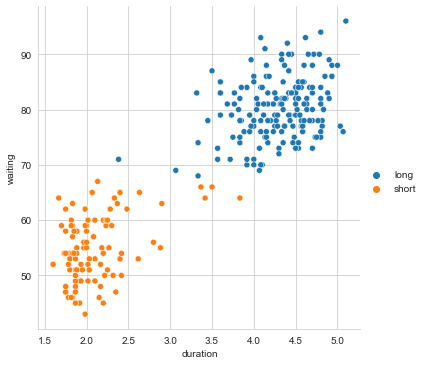

In [28]:
sns.set_style('whitegrid')
sns.relplot(data=geyser, x='duration', y='waiting', hue=geyser.kind.tolist());

*Notemos que, pese a tratarse de un problema no supervisado, el paso a paso es prácticamente igual al usado con los modelos supervisados.*

##### 1. Seleccionamos una clase de modelo

Vamos a aplicar una técnica clásica de _clustering_ llamada K-Means.

In [30]:
from sklearn.cluster import KMeans

##### 2. Elegir los hiperparámetros del modelo

n_clusters define *cuántos clusters queremos obtener* (2) y random_state controla la aleatoriedad inicial. (0)

In [31]:
model =  KMeans(n_clusters=2,random_state=0)

##### 3. Preparar los datos en una matriz de _features_

Como se trata de un problema no supervisado, no contaremos con una variable objetivo. Por eso, construimos la matriz de _features_ descartando la variable *kind*.

In [32]:
X_geyser = geyser.drop('kind', axis=1)
X_geyser.shape

(272, 2)

Dado que K-Means es un algoritmo que trabaja *calculando distancias*, un paso previo al ajuste del modelo consiste en **estandarizar los valores**, de forma de eliminar posibles inconvenientes asociados a la escala de las distintas variables.

La clase **`StandardScaler()`**, transforma los datos, para que las variables tengan *media 0 y desvío estándar 1*.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Los transformadores también se ajustan a los datos, al igual que los estimadores:

In [57]:
scaler.fit(X_geyser)

StandardScaler()

A diferencia de los estimadores, en lugar del método `predict()`, los transformadores tienen el método `transform()`:

In [58]:
X = scaler.transform(X_geyser)

Comparamos los valores originales con los valores estandarizados:

In [59]:
X[:3]

array([[ 0.09849886,  0.59712344,  0.76249285],
       [-1.48145856, -1.24518118, -1.3114877 ],
       [-0.13586149,  0.22866251,  0.76249285]])

In [60]:
X_geyser[:3]

,duration,waiting,cluster
0,3.600,79,1
1,1.800,54,0
2,3.333,74,1


##### 4. Separar los sets de entrenamiento y de testeo

En los problemas de _clustering_ (y de aprendizaje no supervisado en general) *no es necesario hacer la separación de los conjuntos de entrenamiento y testeo.*

##### 5. Ajustar el modelo a los datos

In [61]:
model.fit(X)

KMeans(n_clusters=2, random_state=0)

##### 6. Predecir etiquetas

En este caso, la predicción consiste en generar etiquetas que identifiquen cada observación con un _cluster_ en particular.

Como seleccionamos k=2 clusters, las etiquetas son 0 y 1.

In [62]:
y_km = model.predict(X)
y_km

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

##### 7. Evaluar la _performance_ del modelo


Grafiquemos ahora un scatterplot con las dos variables originales *duration* y *waiting* , pero agregando como tercera dimensión al *cluster asignado*.

Observamos que también separa las observaciones en dos grupos separados, con mínimas diferencias respecto al valor original de la variable *kind*.

Existen métodos más formales para evaluar la performance del modelo, que veremos en las próximas clases.

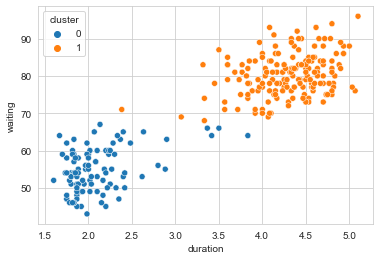

In [63]:
X_geyser['cluster'] = y_km
sns.set_style('whitegrid')
sns.scatterplot(data=X_geyser, x='duration', y= 'waiting', hue='cluster')
plt.show()